# Visualisation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pprint import pprint
from matplotlib.text import Text
from matplotlib.lines import Line2D
from matplotlib.legend import Legend
from matplotlib.text import Annotation
from matplotlib.patches import FancyBboxPatch, Patch
from matplotlib.ticker import PercentFormatter, IndexFormatter
from matplotlib.ticker import AutoLocator, MaxNLocator, LinearLocator, MultipleLocator
from matplotlib.ticker import NullFormatter, FixedFormatter, StrMethodFormatter, ScalarFormatter

In [2]:
# Settings

plt.style.available
plt.style.use('bmh'); plt.style.use('ggplot')

pd.options.display.max_columns = 4 # Default = 20
pd.options.display.max_rows    = 18  # Default = 60

pd.set_option("precision", 4)
pd.set_option("max_rows", 17)
pd.get_option("max_rows")
pd.reset_option("max_rows")
pd.describe_option("max_rows")

display.max_rows : int
    If max_rows is exceeded, switch to truncate view. Depending on
    `large_repr`, objects are either centrally truncated or printed as
    a summary view. 'None' value means unlimited.

    In case python/IPython is running in a terminal and `large_repr`
    equals 'truncate' this can be set to 0 and pandas will auto-detect
    the height of the terminal and print a truncated object which fits
    the screen height. The IPython notebook, IPython qtconsole, or
    IDLE do not run in a terminal and hence it is not possible to do
    correct auto-detection.
    [default: 60] [currently: 60]


# Arrow + text

In [3]:
x, y = np.random.randn(10), np.random.randn(10)

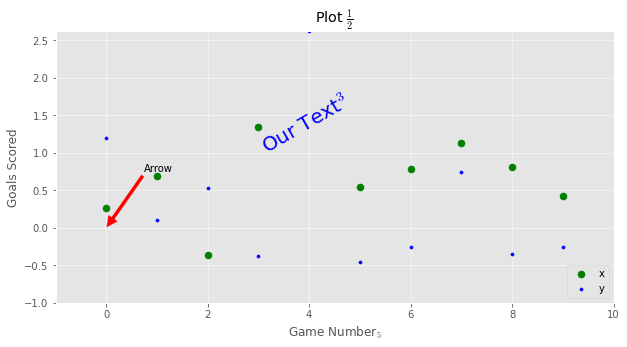

<Figure size 432x288 with 0 Axes>

In [4]:
plt.figure(figsize=(10, 5)) # x,y
plt.title(r"Plot $\frac{1}{2}$")

plt.scatter(range(len(y)), y, c="green", s=50, label="x")
plt.scatter(range(len(x)), x, c="blue",  s=10, label="y") 

plt.xlim(-1, len(x))
plt.ylim(-1, max(x))

plt.xlabel("Game Number$_5$")
plt.ylabel("Goals Scored")

# Text
plt.text(x=3, y=1, s=r"Our Text$^3$", fontsize=20, c="blue", rotation=30)

# Arrow
plt.annotate("Arrow", xy=(0, 0), xytext=(0.75, .75), arrowprops=dict(facecolor="red", shrink=3))

plt.legend(loc="lower right")
plt.show() 

plt.savefig("MyPlot.pdf")

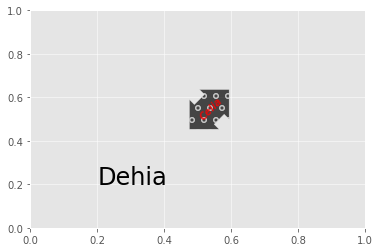

In [5]:
text1 = Text(x=.5, y=.5, text="Celia")
text2 = Text(x=.2, y=.2, text="Dehia")

fig, ax = plt.subplots()
t1, t2  = ax._add_text(text1), ax._add_text(text2)

# t1
t1.set_alpha(.8)
t1.set_color("red")
t1.set_rotation(45)
t1.set_weight("bold")
t1.set_style("italic")
t1.set_family("sans-serif")
t1.set_y(.5) 
# circle/ arrow , pad=.9
# Annotation is more versatile than text
# You can join an arrow
t1.set_bbox(dict(facecolor="black", boxstyle="darrow, pad=.9", alpha=.7, hatch='o'))

# t2
t2.set_size(24)

Text(0.8, 0.1, 'Dehia')

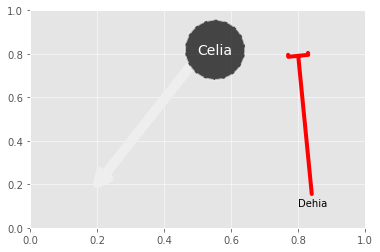

In [6]:
fig, ax = plt.subplots()

# Arrow 1
annot = Annotation("Celia", xy=(.2, .2), xytext=(.5, .8), arrowprops=dict(width=2))

an1 = ax._add_text(annot)
an1.set_bbox(dict(facecolor="black", boxstyle="circle, pad=.9", alpha=.7, ls="dashed", lw=2))
an1.set_size(14)
an1.set_color("White")

arrow = an1.arrow_patch
arrow.set_linewidth(8)
arrow.set_arrowstyle("-[")
 
# Arraw 2 
# Easiest way to create an arraw
ax.annotate("Dehia", xy=(.8, .8), xytext=(.8, .1), # width=2 Nop
            arrowprops=dict(color="r", arrowstyle="-[", lw=4))

# Hist

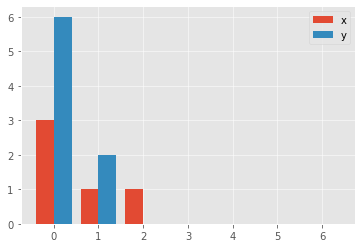

In [7]:
plt.hist(x=(x, y), bins=range(8), label=["x", "y"], align="left")

plt.legend(loc="best")
plt.show()

# Hist2d

In [8]:
x, y = np.arange(10), np.arange(10) + 4

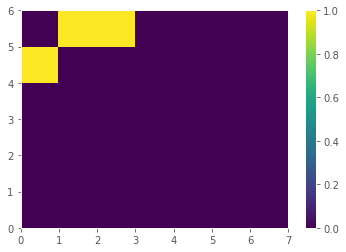

In [9]:
plt.hist2d(x=x, y=y, bins=(range(8), range(7)))

plt.colorbar() # fig.colorbar()
plt.show()

# Patches

There are 3 patches in ax


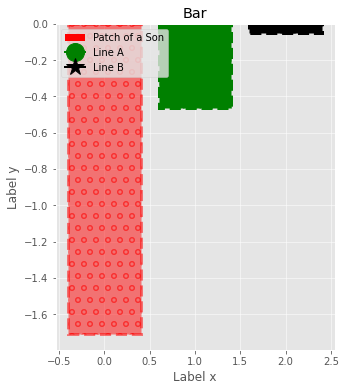

In [10]:
fig, ax = plt.subplots(figsize=(5, 6))

ax.set_title("Bar")
ax.set_xlabel("Label x")
ax.set_ylabel("Label y")

# Create 3 patches
ax.bar(range(3), np.random.randn(3)) # Marche mal
print(f"There are {len(ax.patches)} patches in ax")

ax.patches[0].set_alpha(.5)

for bar, c in zip(ax.patches, ["red", 'green', 'black']):
    bar.set_edgecolor('y') #g: green, b: blue, r: red
    bar.set_ls("dashed")
    bar.set_lw(3)
    bar.set_hatch("o") # "\\"
    bar.set_color(c)

# Create labels
p1 = Patch(facecolor='red', label='Patch of a Son')
l1 = Line2D([], [], color='green', label="Line A", marker="o", markersize=18)
l2 = Line2D([], [], color='black', label="Line B", marker="*", markersize=18)

legend2 = Legend(ax, handles=[p1, l1, l2], 
                 labels=[p1.get_label(), l1.get_label(), l2.get_label()], loc=2)

ax.add_artist(legend2)

# Spines

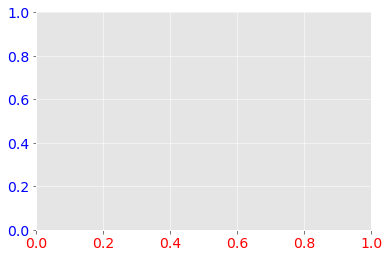

In [11]:
fig, ax = plt.subplots()

ax.spines['top'].set_visible(False)  # right, bottom, left 
ax.spines['right'].set_visible(False) # right, bottom, left 

ax.tick_params(axis="x", 
               labelcolor="red",
               labelsize=14,
               #top="Off",
               #labeltop="Off",
               bottom="On",
               labelbottom="On")

ax.tick_params(axis="y", 
               labelcolor="blue",
               labelsize=14)

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),
OrderedDict([('left', <matplotlib.spines.Spine object at 0x000001A716A1D2E0>),
             ('right', <matplotlib.spines.Spine object at 0x000001A716A1D3D0>),
             ('bottom', <matplotlib.spines.Spine object at 0x000001A716A1D4C0>),
             ('top', <matplotlib.spines.Spine object at 0x000001A716A1D5B0>)])


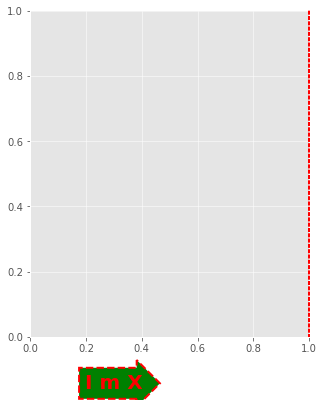

In [12]:
fig, ax = plt.subplots(figsize=(5, 6))

pprint(ax.get_children())
pprint(ax.spines)

# spines 1
ax.spines['top'].set_visible(False) # right, bottom, left 

# spines 2
ax.spines['right'].set(lw=2, ls='dotted', color="red")

# xlabel
ax.set_xlabel("I m X") 
# Or ax.xaxis.set_label_text('I m Y')

xlabel = ax.xaxis.get_label()
xlabel.set_size(20)
xlabel.set_fontweight("bold")
xlabel.set_color("red")
xlabel.set_x(.3)

# box fo xlabel
xlabel.set_bbox(dict(facecolor="green", boxstyle="rarrow", 
                     edgecolor="red", linestyle="dashed", linewidth=2))
ax.xaxis.labelpad = 20

In [13]:
x, y, z = np.arange(10), np.random.randn(10), np.random.randn(10)

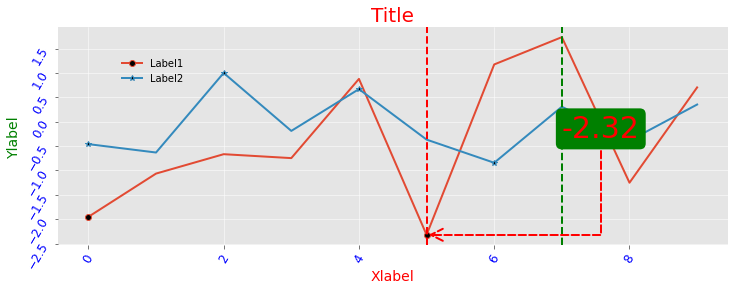

In [14]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(x, y, label="Label1", marker='o', 
        markevery=5, markerfacecolor="black")
ax.plot(x, z, label="Label2", marker='*', 
        markevery=2, markerfacecolor="black")

p_min, p_max = y.min(), y.max()
x_min, x_max = y.argmin(), y.argmax()

ax.axvline(x_min, color="red",   ls="dashed")
ax.axvline(x_max, color="green", ls="dashed")

min_annot = ax.annotate(f"{p_min:.2f}", 
                        xy=(x_min, p_min),
                        xytext=(x_min + 2, p_min + 2),
                        size=30, 
                        color="r",
                        arrowprops=dict(arrowstyle='->'))

min_annot.arrow_patch.set_connectionstyle("angle, angleA=-90")
min_annot.arrow_patch.set(lw=2, linestyle="dashed", color="red")
min_annot.set_bbox(dict(facecolor="g", boxstyle="round, pad=0.2", lw=0))

ax.set_title("Title", size=20, color="r")
ax.set_xlabel("Xlabel", size=14, c="red")
ax.set_ylabel("Ylabel", size=14, c="green")

ax.tick_params(axis="both", labelsize=12, 
               labelcolor="blue", 
               left='Off', bottom='Off', rotation=60)

for spine in ["bottom", "left", "right", 'top']:
    ax.spines[spine].set_visible(False)

ax.legend(frameon=False, loc="best")
ax.legend_.set_bbox_to_anchor([0.2, 0.9])
ax.legend_.legendPatch.set_boxstyle("round, pad=0.5, rounding_size=3")

# Plot with Pandas

In [15]:
# Import Series / DF with the read_csv 
df = pd.read_csv(filepath_or_buffer="./data/Universities.csv", sep=',')
df.head(3)

,Sector,University,...,Completions,Geography
0,"Private for-profit, 2-year",Pima Medical Institute-Las Vegas,...,591,Nevada
1,"Private for-profit, less-than 2-year",Healthcare Preparatory Institute,...,28,Nevada
2,"Private for-profit, less-than 2-year",Milan Institute-Las Vegas,...,408,Nevada


<AxesSubplot:>

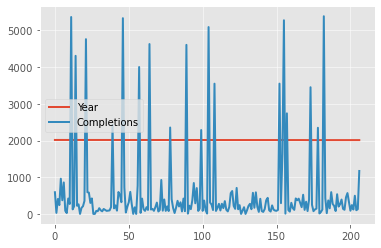

In [16]:
df[["Year", "Completions"]].plot()

<AxesSubplot:xlabel='Year', ylabel='Completions'>

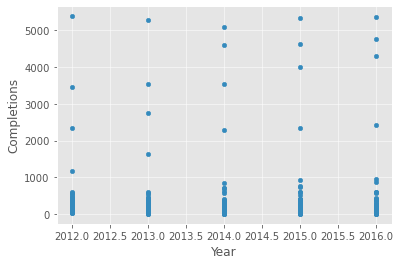

In [17]:
df.plot(x='Year', y='Completions', kind='scatter')

<AxesSubplot:>

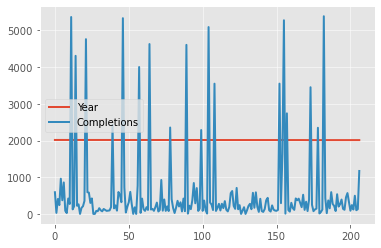

In [18]:
df.plot()

<AxesSubplot:>

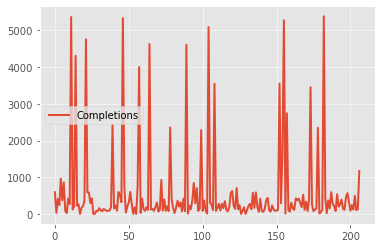

In [19]:
df.plot(y='Completions')

In [20]:
data = pd.read_csv("./data/original.csv")
data.head(2)

,Date,State,...,MedQ,LowQ
0,2014-01-01,Alabama,...,198.64,149.49
1,2014-01-01,Alaska,...,260.60,388.58


<AxesSubplot:ylabel='Density'>

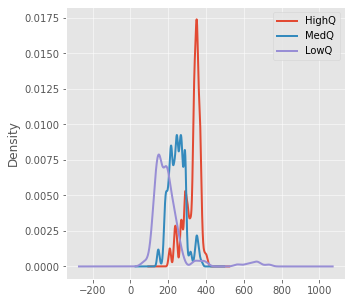

In [21]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.grid(True)
data.plot.kde(ax=ax) # Kernel Density Estimate

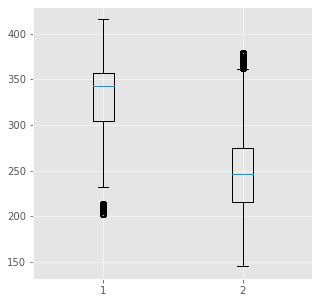

In [22]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.boxplot([data.HighQ, data.MedQ])
plt.show()

# imshow

<ipython-input-23-d2765b3bfcfa>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.columns)
<ipython-input-23-d2765b3bfcfa>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(data.columns)


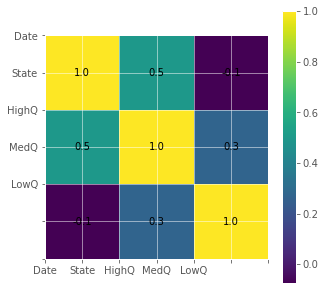

In [23]:
fig, ax = plt.subplots(figsize=(5, 5))

a = ax.imshow(data.corr().values)


ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
fig.colorbar(a)
for (x, y), value in np.ndenumerate(data.corr()):
    ax.annotate(f"{value:.1f}", xy=(x,y), va="center", ha="center")

# Bar

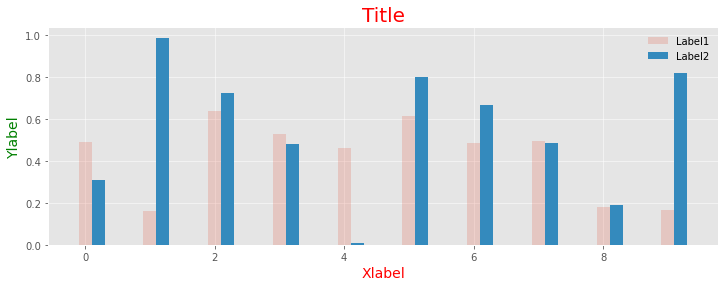

In [24]:
x = np.arange(10)
y = np.random.rand(10)
z = np.random.rand(10)

fig, ax = plt.subplots(figsize=(12, 4))

l1 = ax.bar(x, y, label="Label1", width=.2, alpha=.2)
l2 = ax.bar(x+.2, z, label="Label2", width=.2)

p_min, p_max = y.min(), y.max()
x_min, x_max = y.argmin(), y.argmax()


ax.set_title("Title", size=20, color="r")
ax.set_xlabel("Xlabel", size=14, c="red")
ax.set_ylabel("Ylabel", size=14, c="green")
ax.tick_params(left='off', bottom='Off')

ax.legend(frameon=False, loc="best")

In [25]:
data = pd.read_csv("./data/legend-box.csv")
data.head(1)

,Age,Women,Men
0,Under 20 years,27.6,11.7


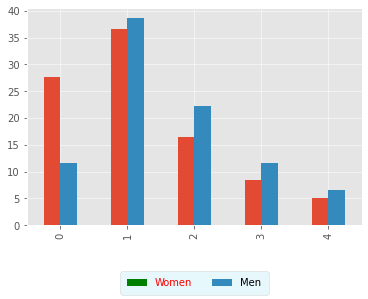

In [26]:
fig, ax = plt.subplots()
data.plot.bar(ax=ax)

# Hands-on 1
ax.legend(ncol=2, loc="upper center")
ax.legend_.legendPatch.set(boxstyle='round', facecolor="#e0f7fa")
ax.legend_.set_bbox_to_anchor([.5, -.2])
ax.legend_.texts[0].set_color('red')
ax.legend_.legendHandles[0].set_facecolor('green')

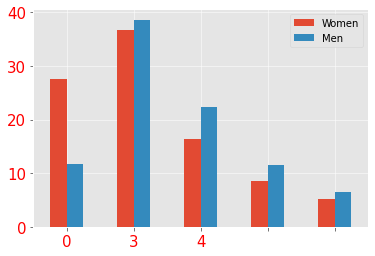

In [28]:
fig, ax = plt.subplots()
data.plot.bar(ax=ax)

# Hands-on 2
# Toute la liste des 'y' -> ax.yaxis.get_major_ticks() 
t25 = ax.yaxis.get_major_ticks()[5]
#t25.label2On = True   # Afficher le chiffre t25 de l'autre coté
t25.label2.set_visible(True)
#t25.label1On = False  # Desactiver le chiffre t25 de l'autre coté
t25.label1.set_visible(False)
#t25.tick2On = True    # Activer le tiret
t25.tick2line.set_visible(True)
#t25.tick1On = False   # Désactiver le tiret
t25.tick1line.set_visible(False)

ax.tick_params(axis="y", labelcolor="red", labelsize=15)
ax.tick_params(axis="x", labelrotation=0, labelcolor="red", labelsize=15)

#ax.yaxis.set_major_formatter(StrMethodFormatter(f"{x:.1f} USD"))
ax.xaxis.set_major_formatter(FixedFormatter([0, 3,4]))

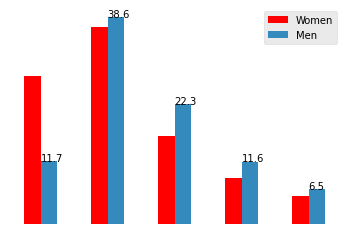

In [29]:
fig, ax = plt.subplots()
data.plot.bar(ax=ax)

# Hands-on 3
for patch in ax.containers[0].patches:
    patch.set_facecolor("red")

for patch in ax.containers[1].patches:
    ax.annotate(str(patch.get_height()), 
                xy=(patch.get_x(), 
                patch.get_height()))

ax.legend() # Reset
ax.set_axis_off()

# Scatter

[None, None, None]

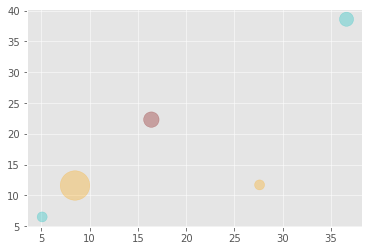

In [30]:
fig, ax = plt.subplots()
ax.scatter("Women", "Men", data=data)
ax.collections[0].set(sizes=[100, 200, 240, 870], color=["orange", "c", "maroon"], alpha=.3)

# Seaborn

In [31]:
d = pd.read_csv('data/seaborn1.csv')
d.head(1)

,Sepal length,Sepal width,...,Petal width,Class
0,5.1,3.5,...,0.2,0


C:\anaconda_3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sepal length', ylabel='Petal width'>

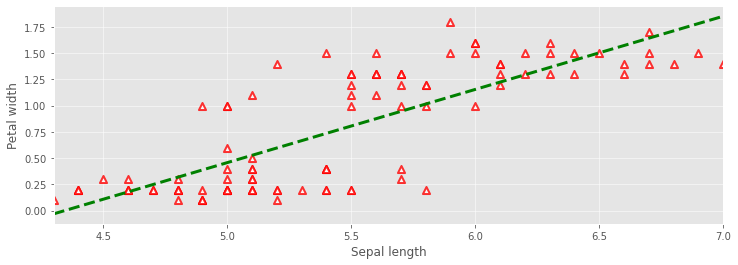

In [32]:
ax  = plt.gca()
fig = plt.gcf()

fig.set_size_inches(12, 4)

sns.regplot('Sepal length','Petal width', data=d, 
            scatter=True,   # this is the default option
            fit_reg = True, # turn on/off fitting line
            order = 1,      # for polynomial regression
            n_boot=10,
            truncate=True,
            x_jitter = 0,
            y_jitter=0, # should line fill x axis or not
            marker='^',
            scatter_kws=dict(edgecolor='r',lw=2, facecolor='w', s=50),
            line_kws=dict(color='g', linestyle='dashed'),
            ci=0)

C:\anaconda_3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sepal length', ylabel='Class'>

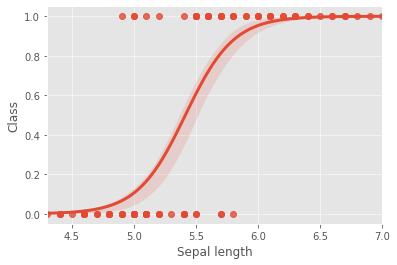

In [33]:
"""
However, if Y is binary, set logistic to true 
to make a regression line follow a sigdmoid function
"""

ax  = plt.gca()
fig = plt.gcf()

sns.regplot('Sepal length','Class', data=d, 
            logistic=True, n_boot=5) 
# Since Logistic is more compurationally expensive,try decreasing bootstrap number

In [34]:
titanic = pd.read_csv('data/titanic.csv')
titanic.head(2)

,survived,pclass,...,alive,alone
0,0,3,...,no,False
1,1,1,...,yes,False


# countplot

<AxesSubplot:xlabel='sex', ylabel='count'>

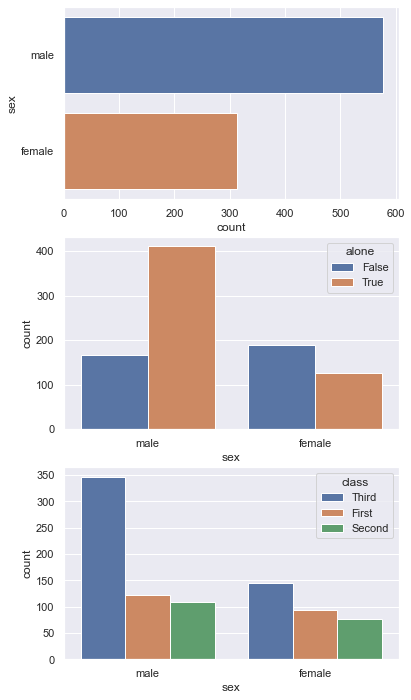

In [35]:
# Lets count number of male and female passengers and try grouping

sns.set(style="darkgrid")
fig, axes = plt.subplots(3, figsize=(6,12))

# Plot 1.1: Group by gender
sns.countplot(y='sex', data=titanic, ax=axes[0]) 

# Plot 1.2: Group by gender
"""
fig, ax = plt.subplots()

gender_df = titanic.sex.value_counts()
gender_df.plot.barh(rot=0, ax=ax)
'''
"""
# Plot 2.1: Group by (gender, alone)
sns.countplot(x='sex', data=titanic, ax=axes[1], hue='alone') # Groupby "alone"

# Plot 2.2: Group by (gender, alone)
'''
fig, ax = plt.subplots()

df2 = titanic[['alone', 'sex']].groupby(['sex','alone']).agg(np.size).unstack()
titanic[['alone', 'sex']].groupby(['sex','alone']).size().unstack().plot.barh(rot=0)

df2.plot.bar(rot=0, ax=ax)
'''

# Plot 3: Group by (gender, class)
sns.countplot(x='sex', data=titanic, ax=axes[2], hue='class') # Groupby "class"

In [36]:
#Feed file path to read_csv
tips = pd.read_csv('data/tips.csv')

mi, ma = tips["total_bill"].min(), tips["total_bill"].max()
bins = np.linspace(mi, ma, 5)
tips['bill_bin'] = pd.cut(tips.total_bill, bins).astype('category')

tips.head(2)

,total_bill,tip,...,size,bill_bin
0,16.99,1.01,...,2,"(15.005, 26.94]"
1,10.34,1.66,...,3,"(3.07, 15.005]"


# barplot

Text(0.5, 1.0, 'Most contributing bill ranges')

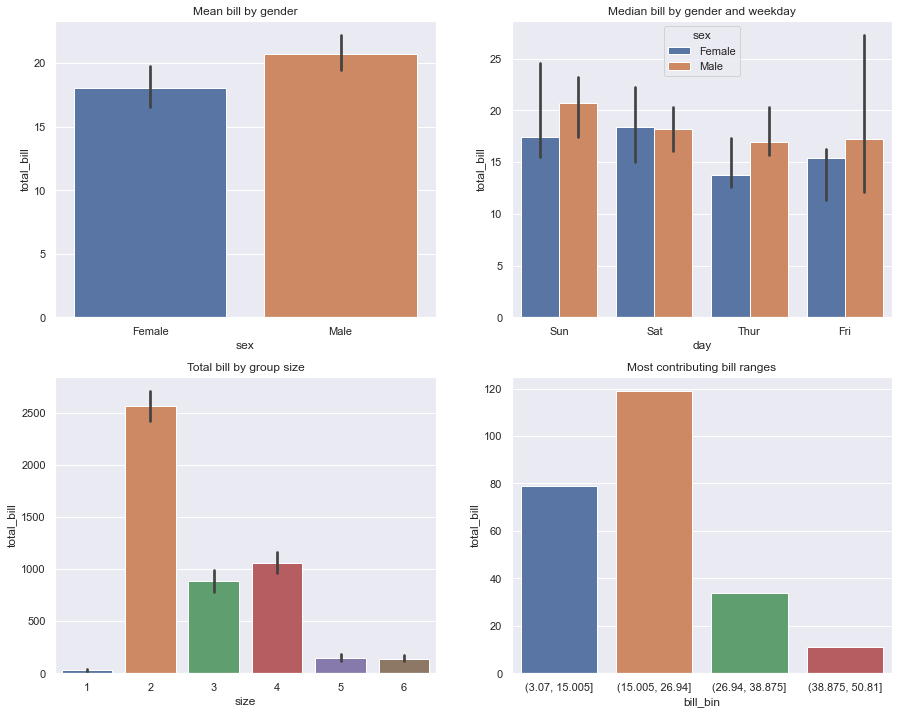

In [37]:
# Instantiate a figure and allocate 4 axes, on a 2-by-2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

sns.barplot(x='sex', y='total_bill', data=tips, ax=axes[0,0], estimator=np.mean)
axes[0,0].set_title('Mean bill by gender')

sns.barplot(x='day', y='total_bill', data=tips, ax=axes[0, 1], hue='sex', estimator=np.median)
axes[0,1].set_title('Median bill by gender and weekday')

sns.barplot(x='size', y='total_bill', data=tips, ax=axes[1,0], estimator=np.sum)
axes[1,0].set_title('Total bill by group size')

sns.barplot(x='bill_bin', y='total_bill', data=tips, estimator=np.size, ax=axes[1,1])
axes[1,1].set_title('Most contributing bill ranges')

# boxplot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

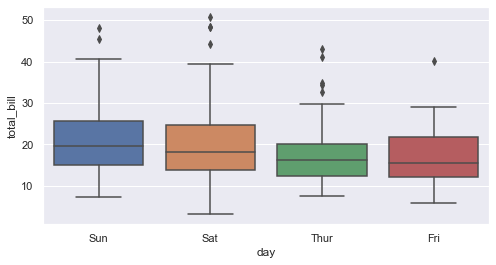

In [38]:
fig, ax = plt.subplots(figsize=(8,4))

sns.boxplot(x='day', y='total_bill', data=tips, ax=ax)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

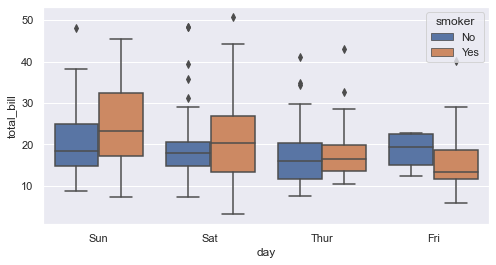

In [39]:
fig, ax = plt.subplots(figsize=(8,4))

sns.boxplot(x='day', y='total_bill', data=tips, ax=ax, hue='smoker')

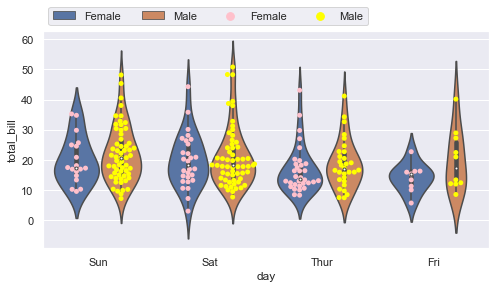

In [40]:
fig, ax = plt.subplots(figsize=(8,4))

sns.swarmplot(x='day', y='total_bill', data=tips, ax=ax, hue='sex', dodge=True, palette=dict(Female="pink", Male="yellow"))
sns.violinplot(x='day', y='total_bill', data=tips, ax=ax, hue='sex', dodge=True)

ax.legend(ncol=5, loc="lower left", bbox_to_anchor=[0, 1])

# distplot

C:\anaconda_3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda_3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Total Bill Distribution Plot')

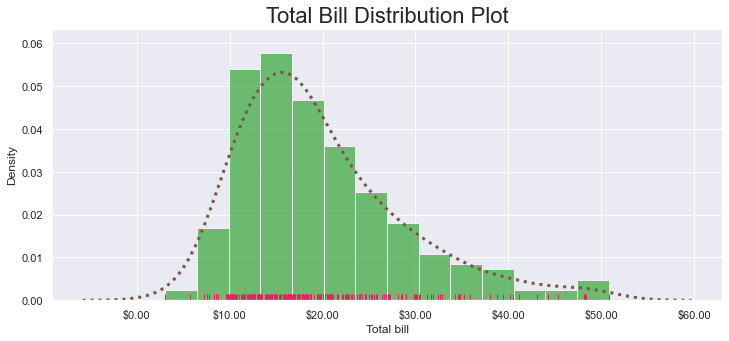

In [41]:
fig, ax = plt.subplots(figsize=(12,5))

sns.distplot(tips.total_bill, 
             ax=ax, 
             hist=True, # Would you like to see histogram
             rug=True, # how about rugplot
             axlabel='Total bill',
             kde=True,       # La ligne de la gaussienne, suit norm_hist
             norm_hist=True, # Set this and KDE to false to show count
                             # rather than probability distribution
              kde_kws = dict(color='#795548', linewidth=3, linestyle='dotted', label='KDE'),
              hist_kws = dict(color='#4CAF50', alpha=0.8),
              rug_kws=dict(color='#E91E63'))

# Let's do little more formatting
mft = StrMethodFormatter("${x:.2f}")

ax.xaxis.set_major_formatter(mft)
ax.set_title('Total Bill Distribution Plot', size=22)

# jointplot

C:\anaconda_3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


There are 3 plots 3


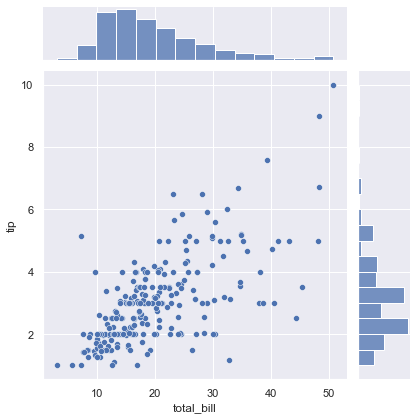

In [42]:
sns.jointplot("total_bill", "tip", data=tips)

fig = plt.gcf() # Get the current figure
print(f"There are 3 plots {len(fig.axes)}")

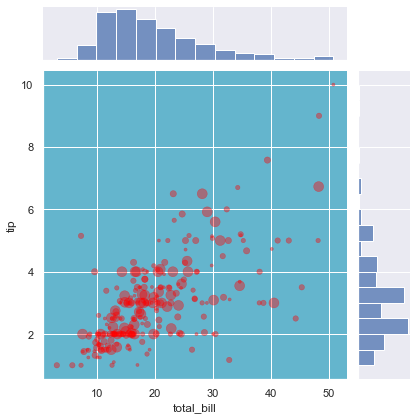

In [43]:
fig.axes[0].set_facecolor("c")
fig.axes[0].collections[0].set(color="red", sizes=[10, 20, 30, 40, 100], alpha=.4)
fig

C:\anaconda_3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


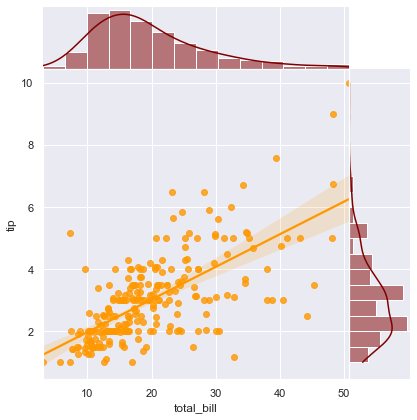

In [44]:
sns.jointplot("total_bill", "tip", data=tips,
             kind='reg', # scatter, resid, hex
             space=0,
             joint_kws=dict(color='#FF9800'),
             marginal_kws=dict(color="maroon"))

In [45]:
data = pd.read_csv(filepath_or_buffer='data/iris.csv', 
                   usecols=["Sepal length", "Sepal width", "Petal length", "Petal width", "Type"]).dropna(how="all")

data = data.astype({'Type':'category'})
data.head()

,Sepal length,Sepal width,...,Petal width,Type
0,5.1,3.5,...,0.2,Setosa
1,4.9,3.0,...,0.2,Setosa
2,4.7,3.2,...,0.2,Setosa
3,4.6,3.1,...,0.2,Setosa
4,5.0,3.6,...,0.2,Setosa


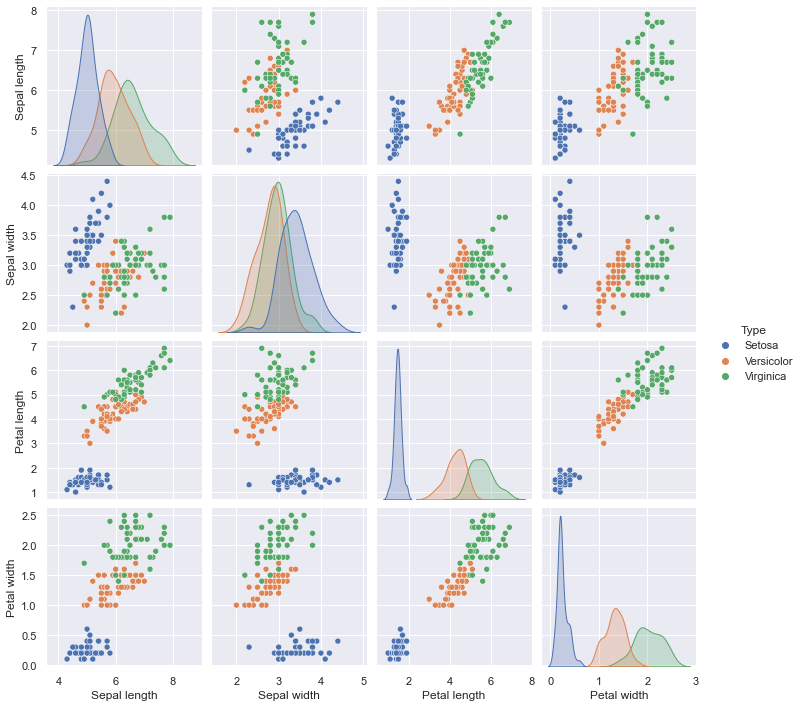

In [46]:
g = sns.pairplot(data, hue='Type')

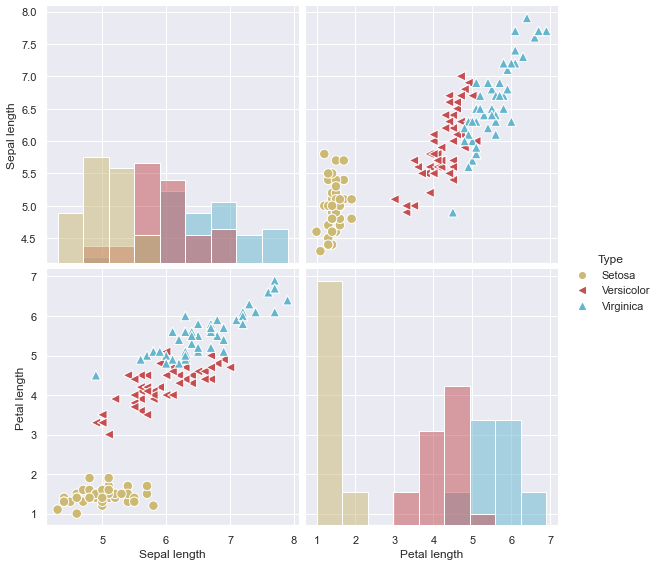

In [47]:
sns.pairplot(data, 
             vars=['Sepal length', 'Petal length'], # Choose specific features to draw
             hue='Type', # Set hue parameter to Type
             diag_kind='hist', # Choose between hist/kde
             markers=['o','<','^'], # For each type, set markertype
             height=4, # Control figure size by setting height for each axes
             palette=['y','r','c'], # Control marker colors
             plot_kws=dict(s=90, linewidth=1)) #manage scatter point styles

# pairplot

C:\anaconda_3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


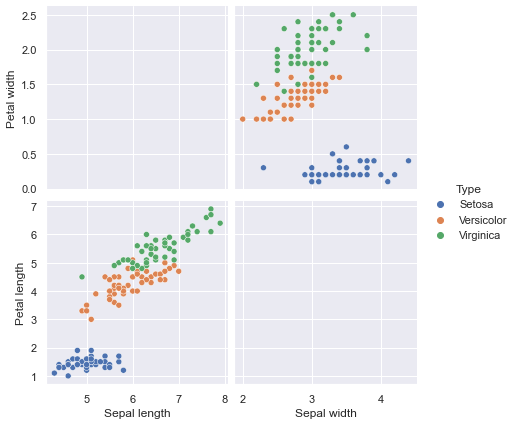

In [48]:
g = sns.pairplot(data, x_vars=['Sepal length','Sepal width'], y_vars=['Petal width','Petal length'], hue='Type', size=3)

# let's make a handler for the figure
fig = plt.gcf()

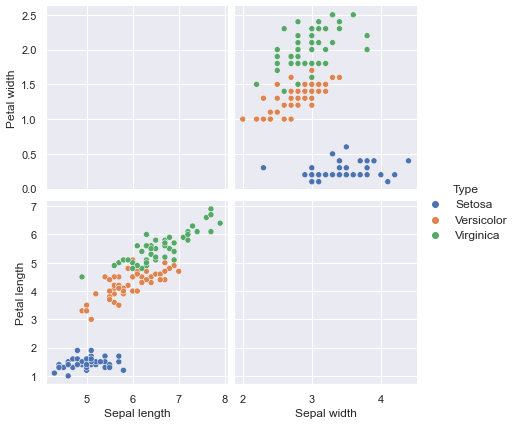

In [49]:
lg = fig.legends[0]

# change the legendpatch and make it rounded
lg.legendPatch.set_boxstyle('round, rounding_size=2')

for l in lg.texts:
    l.set_size(12)

fig

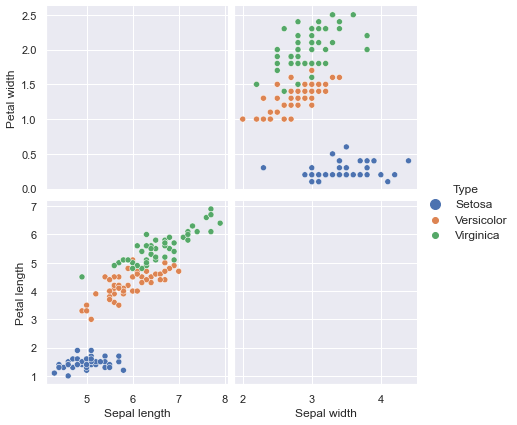

In [50]:
set_handle = lg.legendHandles[0]
# This returns a Path Collection
set_handle.set_sizes([100])
fig

C:\anaconda_3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[None, None]

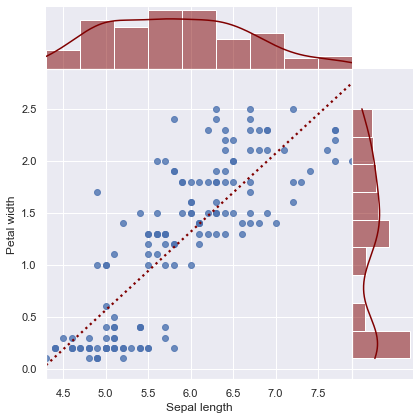

In [51]:
sns.jointplot('Sepal length', 'Petal width', data=data, 
              kind="reg", 
              ci=None, 
              marginal_kws=dict(color="maroon"),
              space=0)

fig = plt.gcf()

fig.axes[0].lines[0].set(color='maroon', linestyle='dotted')

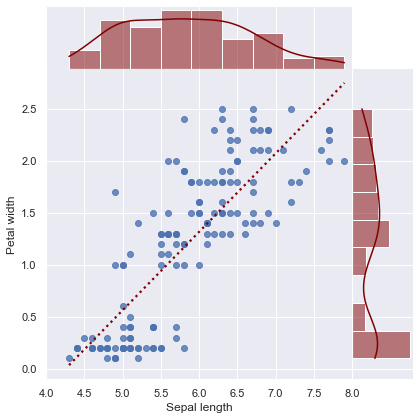

In [52]:
# Hands-on 6
# Make line go above and beyong all axes
fig.axes[0].lines[0].set_clip_on(False)
fig.axes[0].set_xlim(4, 8)
fig.axes[0].set_zorder(2)
fig.axes[1].set_zorder(1)
fig.axes[2].set_zorder(0)
fig

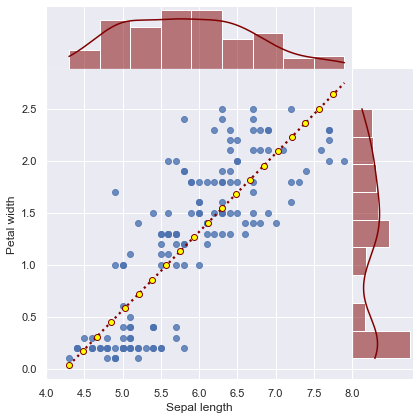

In [53]:
# Hands-on 6
# Make line go above and beyong all axes
fig.axes[0].lines[0].set(marker='o', markevery=5, markerfacecolor='yellow')
fig